# Wrangle and Analyze Data
# #WeRateDogs 

WeRateDogs is a twitter account that rates dogs. we are using data from their account for data wrangling course.<br>
A project which is part of Udacity Data Analyst Nanodegree.

#### Steps to Effective Data Wrangling are: 
1. We will first gather data from 3 differents sources using different methods
2. Then Assess the data visually and programatically for quality and tidiness issues. 
3. And then we are going to resolve those issues. 
4. The last step is no longer data wrangling, we are going to analyze the data. Give insights and make vizualisations. 


## Gathering data
We have 3 sources of data to gather for this analysis.
1. twitter-archive-enhanced.csv, this file was already provided as a csv file. we are going to use pandas read_csv to import the file
2. image_predictions.tsv by using request library to download it
3. By using tweepy, extract data  from twitter API and store it in a file named tweet_json.txt

In [178]:
# importing all the library that we will need
import pandas as pd
import numpy as np
import tweepy
import requests
import json
import matplotlib.pyplot as plt;plt.rcdefaults()
import seaborn as sns
sns.set_style('darkgrid')
import re

### Importing file 1: twitter-archive-enhanced.csv

In [179]:
#import the twitter-archive-enhanced.csv
#Reading a sample to have a feel of the data
df_1 = pd.read_csv('twitter-archive-enhanced.csv')
df_archive = df_1.copy()
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1891,674764817387900928,NaN,NaN,2015-12-10 01:37:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",These two pups are masters of camouflage. Very dedicated to the craft. Both must've spent decades practicing. 10/10s https://t.co/RBiQ8hPqwr,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/674764817387900928/photo/1,https://twitter.com/dog_rates/status/674764817387900928/photo/1",10,10,None,None,None,None,None
2030,671789708968640512,NaN,NaN,2015-12-01 20:35:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is space pup. He's very confused. Tries to moonwalk at one point. Super spiffy uniform. 13/10 I love space pup https://t.co/SfPQ2KeLdq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671789708968640512/photo/1,13,10,space,None,None,None,None
28,886680336477933568,NaN,NaN,2017-07-16 20:14:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Derek. He's late for a dog meeting. 13/10 pet...al to the metal https://t.co/BCoWue0abA,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886680336477933568/photo/1,13,10,Derek,None,None,None,None
150,863062471531167744,NaN,NaN,2017-05-12 16:05:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Quinn. She's quite the goofball. Not even a year old. Confirmed 13/10 but she really needs your help \n\nhttps://t.co/MOBkQnyHib https://t.co/EsOB4rLEKt,NaN,NaN,NaN,"https://www.gofundme.com/helpquinny,https://twitter.com/dog_rates/status/863062471531167744/photo/1,https://twitter.com/dog_rates/status/863062471531167744/photo/1,https://twitter.com/dog_rates/status/863062471531167744/photo/1,https://twitter.com/dog_rates/status/863062471531167744/photo/1",13,10,Quinn,None,None,None,None
859,763183847194451968,NaN,NaN,2016-08-10 01:23:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Clark. He collects teddy bears. It's absolutely h*ckin horrifying. 8/10 please stop this Clark https://t.co/EDMcwt86fU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/763183847194451968/photo/1,8,10,Clark,None,None,None,None


### Using Request to programatically download  image_predictions.tsv from given url

In [180]:
#create a variable containing the url from which we want to request Data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
#save the requested url in a file named image_predictions.tsv
with open('image_predictions.tsv', 'wb') as f:
    f.write(response.content)
#import the file in a dataframe with pandas
df_2 = pd.read_csv('image_predictions.tsv', delimiter='\t')
image_df = df_2.copy()
image_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1535,790337589677002753,https://pbs.twimg.com/media/CvfX2AnWYAAQTay.jpg,1,Pembroke,0.658808,True,Cardigan,0.153096,True,toy_terrier,0.102299,True
345,672272411274932228,https://pbs.twimg.com/media/CVRkLuJWUAAhhYp.jpg,2,pug,0.914685,True,Norwegian_elkhound,0.014982,True,Siamese_cat,0.009221,False
746,687664829264453632,https://pbs.twimg.com/media/CYsTg1XUsAEPjxE.jpg,1,pug,0.957365,True,French_bulldog,0.038559,True,toy_poodle,0.000667,True
402,673697980713705472,https://pbs.twimg.com/media/CVl0vFeWoAAMTfg.jpg,1,porcupine,0.151876,False,hen,0.111380,False,doormat,0.058934,False
1681,813812741911748608,https://pbs.twimg.com/media/C0s-XtzWgAAp1W-.jpg,1,French_bulldog,0.709146,True,Boston_bull,0.247621,True,boxer,0.018855,True


### Retrivieng Data from Twitter API

In [181]:
#authentication with twitter API using 
auth = tweepy.OAuthHandler('p2BWpeoQLwgyO9HNBAeYAwSAu' ,'fRnHPR225sL9lQtgvANK3tZMVh3TrwkPw6TkRqHMsY3EWgHW7y')
auth.set_access_token('1090421968623390720-cenMGb4xHFMnuyBXBZuLH4QuCRIaKZ','XMGq0HEaSWrSXVQMT080gkPToTx6HwuH0X4AWCaVGlR4R')

#create api to create to twitter with credetianls
api = tweepy.API(auth , wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [182]:
#putting tweet ids from archive_df in a list. the list will be used to query twitter api for more data
tweet_ids = df_archive['tweet_id'].tolist()

In [183]:
# #looping through the list of tweet_ids to query to twitter API, saving the changes to tweet.json file
# with open('tweet_json.txt', 'a', encoding='utf8') as file:
#     for tweet_id in tweet_ids:
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             json.dump(tweet._json, file)
#             file.write('\n')
#         except tweepy.TweepError as e:
#                 print (e.reason)
#                 #print (e.api_code)

In [184]:
#taking the api data from json file to panda dataframe
api_data = []

with open('tweet_json.txt') as json_file:
    for line in json_file:
        try: 
            json_data = json.loads(line)
            api_data.append(json_data)
        except:
            continue
df_3 = pd.DataFrame(api_data)
api_data_df = df_3.copy()
api_data_df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",39467,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200889, 'friends_count': 104, 'listed_count': 2784, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5288, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1501129017', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': True, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}"
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'http

In [185]:
#counting twitter_ids that where not found in the API 
df_archive.tweet_id.count() - api_data_df.id.count()

2

In [186]:
# As specified in the project instructions, I am going to only keep retweet_count and liked tweet(favorite count)
twitter_api_df = api_data_df[['id', 'retweet_count', 'favorite_count']]
twitter_api_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data 
In this section we are going to assess the 3 datasets that we have collected for issues to fix. we will identify and list them. those issues will be fixed in a later section. 
we will both assess the datasets visually and programatically using pandas. 

#### Dataset 1: Twitter Archive
This is the twitter archive data from "twitter-archive-enhanced.csv" file. we imported it in a dataframe called df_archive. 

In [187]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [188]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Quality Issues: 
while visually assessing the dataset visually

In [189]:
df_archive.duplicated().sum()

0

In [190]:
df_archive.name.isnull().sum()

0

In [191]:
len(df_archive.name.unique())

957

In [192]:
df_archive['name'].value_counts()

None              745
a                 55 
Charlie           12 
Oliver            11 
Cooper            11 
Lucy              11 
Penny             10 
Lola              10 
Tucker            10 
Bo                9  
Winston           9  
the               8  
Sadie             8  
an                7  
Toby              7  
Daisy             7  
Bailey            7  
Buddy             7  
Jack              6  
Koda              6  
Scout             6  
Bella             6  
Jax               6  
Oscar             6  
Milo              6  
Dave              6  
Rusty             6  
Leo               6  
Stanley           6  
Chester           5  
                 ..  
Carter            1  
Maude             1  
Herb              1  
Dotsy             1  
Brudge            1  
River             1  
Michelangelope    1  
Tonks             1  
Flurpson          1  
Lilli             1  
Jonah             1  
Mitch             1  
Kayla             1  
Jazzy             1  
Jessiga   

In [193]:
df_archive['floofer'].value_counts()

None       2346
floofer    10  
Name: floofer, dtype: int64

In [194]:
df_archive['doggo'].value_counts()

None     2259
doggo    97  
Name: doggo, dtype: int64

In [195]:
df_archive['pupper'].value_counts()

None      2099
pupper    257 
Name: pupper, dtype: int64

In [196]:
df_archive['puppo'].value_counts()

None     2326
puppo    30  
Name: puppo, dtype: int64

In [197]:
(df_archive.loc[(df_archive[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) > 1]).count()

tweet_id                      14
in_reply_to_status_id         1 
in_reply_to_user_id           1 
timestamp                     14
source                        14
text                          14
retweeted_status_id           2 
retweeted_status_user_id      2 
retweeted_status_timestamp    2 
expanded_urls                 14
rating_numerator              14
rating_denominator            14
name                          14
doggo                         14
floofer                       14
pupper                        14
puppo                         14
dtype: int64

In [198]:
df_archive['rating_numerator'].count(), df_archive['rating_numerator'].isnull().sum()

(2356, 0)

In [199]:
df_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [200]:
df_archive['rating_denominator'].count(), df_archive['rating_denominator'].isnull().sum()

(2356, 0)

In [201]:
df_archive['rating_denominator'].value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

#### Dataset 2: Image Prediction File

In [202]:
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [203]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [204]:
image_df.duplicated().sum()

0

#### Datasets 3: Data from API

In [205]:
twitter_api_df.sample(500)

,id,retweet_count,favorite_count
1373,701889187134500865,1558,3905
1394,699788877217865730,557,2458
2187,668967877119254528,25,161
1341,704761120771465216,3257,7283
837,767191397493538821,4406,13643
614,796563435802726400,8536,0
600,798665375516884993,4519,0
1296,707741517457260545,696,2718
381,827228250799742977,13517,0
679,788908386943430656,14409,30653


In [206]:
twitter_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [207]:
twitter_api_df.duplicated().sum()

0

In [208]:
twitter_api_df.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [209]:
image_df.shape

(2075, 12)

In [210]:
twitter_api_df.shape

(2354, 3)

In [211]:
df_archive.shape

(2356, 17)

### Issues Found: 

#### Data Quality Issues:

1. In the twitter archive file, (from the csv) I doubt that 745 dogs's name is None. I would tend to consider this as missing value. this is a quality issue and should be replaced by NA for missing value. 

2. the columns doggo , floofer, pupper and puppo which are dogs stage have the value None (python equivalent of NA). which is an issue because when doing programatic assessment with pandas, its shows no null values


3. in_reply_to_status_id  with 78 non-null float64 has too many missing values, it would be hard to do any analysis with so many missing values. 

4.  in_reply_to_user_id  with only 78 non-null float64 has too many missing values, it would be hard to do any analysis with this column, to drop


5. retweeted_status_user_id  has too many  missing values    181 non-null float64

6. retweeted_status_timestamp    has too many missing values 181 non-null object

7. retweeted_status_timestamp    with only 181 non-null object has too many  missing values to be useful. The column will be dropped. 
8. some ids tweet_id failed while making taking data from the twitter api. 

9. I also doubt that  55 dogs are really called "a". This might be a typo. 

10. rename the name in the columns for image predictions. from p1 to breed_prediction

11. merge the archive dataset and api dataset based on tweet_ids

12. Incorrect values in rating numerators

13. ID fields need to be stored as strings since no numerical operations needs to be applied on them

#### Tidiness Issues: 

1. Dog stages needs to be combined in one column
2. move the image and breed_prediction columns from image_df to new_df


# Cleaning 

## Quality Issues
Quality issues are cleaned in the order used to list them in the assessement part

#### Define 
Quality issue No 1:<br>
In the df_archive file, in the column name, replace value None by NA

#### code

In [212]:
#code
archive_1 = df_archive.copy()
df_archive['name'].replace('None', np.nan, inplace=True)

#### Test

In [213]:
#test
df_archive.query('name == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Define 
Quality issue No2: <br>
The columns doggo , floofer, pupper and puppo which are dogs stage have the value None.I am going to replace None with NA

#### code

In [214]:
#replacing python None by pandas NA
df_archive['doggo'].replace('None', np.nan, inplace=True)
df_archive['floofer'].replace('None', np.nan, inplace=True)
df_archive['pupper'].replace('None', np.nan, inplace=True)
df_archive['puppo'].replace('None', np.nan, inplace=True)

#### Test

In [215]:
df_archive.loc[(df_archive[['doggo', 'floofer', 'pupper', 'puppo']] == 'None').sum(axis=1) >= 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Define
Quality Issues No 3,4,5,6,7. <br>
removing columns that would be hard to use due to too many missing values 

#### code

In [216]:
df_archive.drop(['in_reply_to_status_id'], inplace=True, axis=1)
df_archive.drop(['in_reply_to_user_id'], inplace=True, axis=1)
df_archive.drop(['retweeted_status_id'], inplace=True, axis=1)
df_archive.drop(['retweeted_status_user_id'], inplace=True, axis=1)
df_archive.drop(['retweeted_status_timestamp'], inplace=True, axis=1)

#### Test

In [217]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  1611 non-null object
doggo                 97 non-null object
floofer               10 non-null object
pupper                257 non-null object
puppo                 30 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


### Define
Quality Issue No 8: <br>
Removing the tweet_id present in the archive file but that where not found in the API

#### Code

In [218]:
#counting twitter_ids that where not found in the API 
df_archive.tweet_id.count() - api_data_df.id.count()

2

In [219]:
#only keeping successful tweet_ids
df_archive_new = df_archive.copy()
df_archive_new = df_archive[df_archive.tweet_id.isin(twitter_api_df.id.tolist())]

#### Test

In [220]:
#checking 
df_archive_new.tweet_id.count() - api_data_df.id.count()

0

### Define
Quality Issue No 9: <br>
From archive_df, now archive_df_new, remove from the name's column the name a

#### Code

In [221]:
df_archive_new['name'].replace('a', np.nan, inplace=True)

C:\Users\gwiza\Anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


#### Test

In [222]:
#test
df_archive_new.query('name == "a"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Define
Quality Issue No 10: <br>
rename the name in the columns for image predictions. from p1 to breed_prediction_1

#### code

In [223]:
# rename the name in the columns for image predictions. from p1 to breed_prediction
image_df.rename(columns={'p1':'breed_prediction'}, inplace=True)

### Test

In [224]:
#testing to verify name change
image_df.columns.tolist()

['tweet_id',
 'jpg_url',
 'img_num',
 'breed_prediction',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

### Define
Quality issue No 11: <br>
merge the archive dataset and api dataset based on tweet_ids

#### Code

In [225]:
# merge the archive dataset and twitter_api_df dataset based on common tweet_ids
new_df = df_archive_new.copy()
new_df = df_archive_new.merge(twitter_api_df,how='inner', left_on='tweet_id', right_on='id')

In [226]:
#since columns tweet_id and id contains the same information, drop one of them
new_df.drop(['id'], inplace=True, axis=1)

#### Test

In [227]:
# retweet_count and favorite_count added
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 14 columns):
tweet_id              2354 non-null int64
timestamp             2354 non-null object
source                2354 non-null object
text                  2354 non-null object
expanded_urls         2295 non-null object
rating_numerator      2354 non-null int64
rating_denominator    2354 non-null int64
name                  1555 non-null object
doggo                 97 non-null object
floofer               10 non-null object
pupper                256 non-null object
puppo                 30 non-null object
retweet_count         2354 non-null int64
favorite_count        2354 non-null int64
dtypes: int64(5), object(9)
memory usage: 275.9+ KB


### Define
Quality issue 12: <br>
correct the values in rating numerators

#### Code

In [228]:
# example of a tweet where the rating numerator did not consider the decimal value
df_archive.query('tweet_id == 786709082849828864')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,NaN,NaN,NaN,NaN


In [229]:
#use a regular expression to include decimal values in the numerator as well as the denominator
ratings = new_df.text.str.extract('((?:\d+\.)?\d+)\/(\d+\.?\d)', expand=True)
ratings

,0,1
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
5,13,10
6,13,10
7,13,10
8,13,10
9,14,10


In [230]:
ratings.columns = ['rating_numerator', 'rating_denominator']
ratings.sample(5)

,rating_numerator,rating_denominator
310,12,10
1007,10,10
1774,11,10
1693,9,10
794,12,10


In [231]:
#make a copy of the archive dataframe before dropping the old ratings numeratior and denominator columns
new_df  = new_df.copy()
new_df.drop(['rating_numerator'], inplace=True, axis=1)
new_df.drop(['rating_denominator'], inplace=True, axis=1)
new_df.head()

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,NaN,NaN,NaN,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,NaN,NaN,NaN,NaN,6514,33819
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,NaN,NaN,NaN,NaN,4328,25461
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,NaN,NaN,NaN,NaN,8964,42908
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,NaN,NaN,NaN,NaN,9774,41048


In [232]:
#merging the ratings object obtained from exctracting string with regular expression
new_df = pd.merge(new_df, ratings, left_index=True, right_index=True)
new_df.head()

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,rating_numerator,rating_denominator
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,NaN,NaN,NaN,NaN,8853,39467,13,10
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,NaN,NaN,NaN,NaN,6514,33819,13,10
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,NaN,NaN,NaN,NaN,4328,25461,12,10
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,NaN,NaN,NaN,NaN,8964,42908,13,10
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,NaN,NaN,NaN,NaN,9774,41048,12,10


#### Test

In [233]:
#checking the same tweet_id after including new columns
new_df.query('tweet_id == 786709082849828864')

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,rating_numerator,rating_denominator
694,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,Logan,NaN,NaN,NaN,NaN,7069,20296,9.75,10


In [234]:
#checking numerator values
new_df.rating_denominator.value_counts()

10     2332
11     3   
50     3   
80     2   
20     2   
70     1   
110    1   
90     1   
16     1   
130    1   
15     1   
40     1   
150    1   
00     1   
120    1   
170    1   
Name: rating_denominator, dtype: int64

In [235]:
#checking the numbers of tweet where the denominator is not equal to 10
(new_df.shape[0])-2316

38

In [236]:
new_df.rating_numerator.value_counts()

12       557
11       464
10       461
13       350
9        159
8        102
14       54 
7        54 
5        35 
6        32 
3        19 
4        17 
2        9  
1        8  
0        2  
9.75     2  
15       2  
420      2  
88       1  
9.5      1  
45       1  
80       1  
204      1  
1776     1  
165      1  
11.26    1  
007      1  
44       1  
13.5     1  
182      1  
666      1  
20       1  
11.27    1  
144      1  
99       1  
121      1  
17       1  
84       1  
960      1  
60       1  
143      1  
50       1  
Name: rating_numerator, dtype: int64

In [237]:
#checking values which seems very high so that I can adjust the regular expression
pd.set_option('display.max_colwidth', -1) 
new_df.query('rating_numerator == "15"')

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,rating_numerator,rating_denominator
284,838916489579200512,2017-03-07 00:57:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI,"https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1",NaN,NaN,NaN,NaN,NaN,38,0,15,10
290,838085839343206401,2017-03-04 17:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10,NaN,NaN,NaN,NaN,NaN,NaN,0,150,15,10


In [238]:
#checking values which seems very high so that I can adjust the regular expression
#it's might be a typo or something else, in any case from the text column, the rating is actually 420
pd.set_option('display.max_colwidth', -1) 
new_df.query('rating_numerator == "420"')

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,rating_numerator,rating_denominator
187,855862651834028034,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,NaN,NaN,27,320,420,10
2072,670842764863651840,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,NaN,NaN,NaN,NaN,NaN,4324,7989,420,10


In [239]:
#checking values which seems very high so that I can adjust the regular expression if necessary
pd.set_option('display.max_colwidth', -1) 
new_df.query('rating_numerator == "1776"')

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,rating_numerator,rating_denominator
977,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,Atticus,NaN,NaN,NaN,NaN,2772,5569,1776,10


In [240]:
new_df[["rating_numerator", "rating_denominator"]] = new_df[["rating_numerator", "rating_denominator"]].apply(pd.to_numeric)

In [241]:
# making a query to find all tweet with a rating above 16
pd.set_option('display.max_colwidth', -1) 
strange_numerator = new_df[(new_df['rating_numerator'] >= 16)]
strange_numerator

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,rating_numerator,rating_denominator
54,881633300179243008,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,NaN,NaN,7,129,17.0,10.0
187,855862651834028034,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,NaN,NaN,27,320,420.0,10.0
188,855860136149123072,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,NaN,NaN,1058,4407,666.0,10.0
289,838150277551247360,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,NaN,NaN,370,1824,182.0,10.0
312,835246439529840640,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,NaN,NaN,83,2259,960.0,0.0
432,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",NaN,NaN,NaN,NaN,NaN,3716,13518,84.0,70.0
900,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,NaN,NaN,NaN,NaN,NaN,2539,5316,165.0,150.0
977,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,Atticus,NaN,NaN,NaN,NaN,2772,5569,1776.0,10.0
1118,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,this,NaN,NaN,NaN,NaN,1434,4196,204.0,170.0
1200,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,Bluebert,NaN,NaN,NaN,NaN,247,2574,50.0,50.0


In [242]:
strange_numerator.shape[0]

21

In [243]:
strange_numerator.tweet_id.tolist()

[881633300179243008,
 855862651834028034,
 855860136149123072,
 838150277551247360,
 835246439529840640,
 820690176645140481,
 758467244762497024,
 749981277374128128,
 731156023742988288,
 716439118184652801,
 713900603437621249,
 710658690886586372,
 709198395643068416,
 704054845121142784,
 697463031882764288,
 684225744407494656,
 684222868335505415,
 682808988178739200,
 677716515794329600,
 675853064436391936,
 670842764863651840]

In [244]:
#since the numerator don't seems right, and they are only 21, I am going to delete them from the dataframe
archive_new = new_df.copy()
new_df = new_df[~new_df.tweet_id.isin(strange_numerator.tweet_id.tolist())]
#df_archive.drop(['in_reply_to_status_id'], inplace=True, axis=1)
new_df.shape[0]

2333

In [245]:
#checking if the shape of the new dataframe is the same 
archive_new.shape[0] - new_df.shape[0] 

21

### Define
Quality issue  No 13:<br>
IDs in the archive dataframe needs to be converted to string

#### code

In [246]:
new_df['tweet_id'] = new_df['tweet_id'].astype(str)

#### Test

In [247]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2353
Data columns (total 14 columns):
tweet_id              2333 non-null object
timestamp             2333 non-null object
source                2333 non-null object
text                  2333 non-null object
expanded_urls         2280 non-null object
name                  1552 non-null object
doggo                 97 non-null object
floofer               10 non-null object
pupper                256 non-null object
puppo                 30 non-null object
retweet_count         2333 non-null int64
favorite_count        2333 non-null int64
rating_numerator      2332 non-null float64
rating_denominator    2332 non-null float64
dtypes: float64(2), int64(2), object(10)
memory usage: 273.4+ KB


## Tidiness Issues

### Define
make one column out of doggo, floofer, pupper, puppo. the new column is dog_stages

#### Code

In [248]:
#check if any dog has more than one stage
new_df.loc[(new_df[['doggo', 'floofer', 'pupper', 'puppo']] ).sum(axis=1) > 1]

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,rating_numerator,rating_denominator


In [249]:
new_df['dog_stages'] = new_df['text'].str.extract('(doggo|floofer|pupper|puppo)', expand=True)

In [250]:
# dropping now useless floofer, pupper, doggo and puppo columns
new_df.drop(['doggo'], inplace=True, axis=1)
new_df.drop(['floofer'], inplace=True, axis=1)
new_df.drop(['pupper'], inplace=True, axis=1)
new_df.drop(['puppo'], inplace=True, axis=1)

#### Test

In [251]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2353
Data columns (total 11 columns):
tweet_id              2333 non-null object
timestamp             2333 non-null object
source                2333 non-null object
text                  2333 non-null object
expanded_urls         2280 non-null object
name                  1552 non-null object
retweet_count         2333 non-null int64
favorite_count        2333 non-null int64
rating_numerator      2332 non-null float64
rating_denominator    2332 non-null float64
dog_stages            391 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 218.7+ KB


### Define
move the image and breed_prediction columns from image_df to new_df

#### Code

In [252]:
# move the image and breed_prediction columns from image_df to new_df
image_df_new = image_df[['tweet_id', 'jpg_url', 'breed_prediction']]

#converting tweet_id column to string
image_df_new['tweet_id'] = image_df_new['tweet_id'].astype(str)

image_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
tweet_id            2075 non-null object
jpg_url             2075 non-null object
breed_prediction    2075 non-null object
dtypes: object(3)
memory usage: 48.7+ KB


C:\Users\gwiza\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [253]:
#final_df = new_df(image_df_new,how='inner', on='tweet_id')
final_df = new_df.merge(image_df_new, how='inner', on='tweet_id')

### Test

In [254]:
#image and breed prediction are added
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2057
Data columns (total 13 columns):
tweet_id              2058 non-null object
timestamp             2058 non-null object
source                2058 non-null object
text                  2058 non-null object
expanded_urls         2058 non-null object
name                  1438 non-null object
retweet_count         2058 non-null int64
favorite_count        2058 non-null int64
rating_numerator      2057 non-null float64
rating_denominator    2057 non-null float64
dog_stages            330 non-null object
jpg_url               2058 non-null object
breed_prediction      2058 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 225.1+ KB


## Storing Cleaned Dataframe to csv file

In [255]:
#storing the clean dataframe to a csv file 
final_df.to_csv('twitter_archive_master.csv', index=False)

## ##WeRateDog Clean Dataset Analysis

In [256]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2057
Data columns (total 13 columns):
tweet_id              2058 non-null object
timestamp             2058 non-null object
source                2058 non-null object
text                  2058 non-null object
expanded_urls         2058 non-null object
name                  1438 non-null object
retweet_count         2058 non-null int64
favorite_count        2058 non-null int64
rating_numerator      2057 non-null float64
rating_denominator    2057 non-null float64
dog_stages            330 non-null object
jpg_url               2058 non-null object
breed_prediction      2058 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 225.1+ KB


#### Most popular Names in the Dataset

In [257]:
#checking value counts for each name
final_df.name.value_counts()

Charlie       11
Oliver        10
Lucy          10
Tucker        10
Penny         10
Cooper        10
Winston       8 
Lola          8 
Bo            8 
Sadie         8 
Toby          7 
the           7 
Daisy         7 
an            7 
Jax           6 
Dave          6 
Bailey        6 
Bella         6 
Koda          6 
Milo          6 
Scout         6 
Rusty         6 
Stanley       6 
Oscar         5 
Buddy         5 
Alfie         5 
Chester       5 
Louis         5 
Leo           5 
Larry         5 
             .. 
Emmy          1 
Grizzwald     1 
Carter        1 
Maude         1 
Tuco          1 
JD            1 
Mauve         1 
Cuddles       1 
Tycho         1 
Meera         1 
Timmy         1 
Apollo        1 
Lilli         1 
Jonah         1 
Mitch         1 
Kayla         1 
Jazzy         1 
Jessiga       1 
Tripp         1 
Marty         1 
Odin          1 
Flurpson      1 
Jeremy        1 
Koko          1 
officially    1 
Noosh         1 
Crawford      1 
Pinot         

### Most common Type of Breed (from prediction)

In [258]:
popular_breed = final_df.breed_prediction.value_counts()
breed=popular_breed.head(11)
breed

golden_retriever      148
Labrador_retriever    97 
Pembroke              88 
Chihuahua             83 
pug                   57 
chow                  44 
Samoyed               43 
toy_poodle            39 
Pomeranian            38 
malamute              30 
cocker_spaniel        30 
Name: breed_prediction, dtype: int64

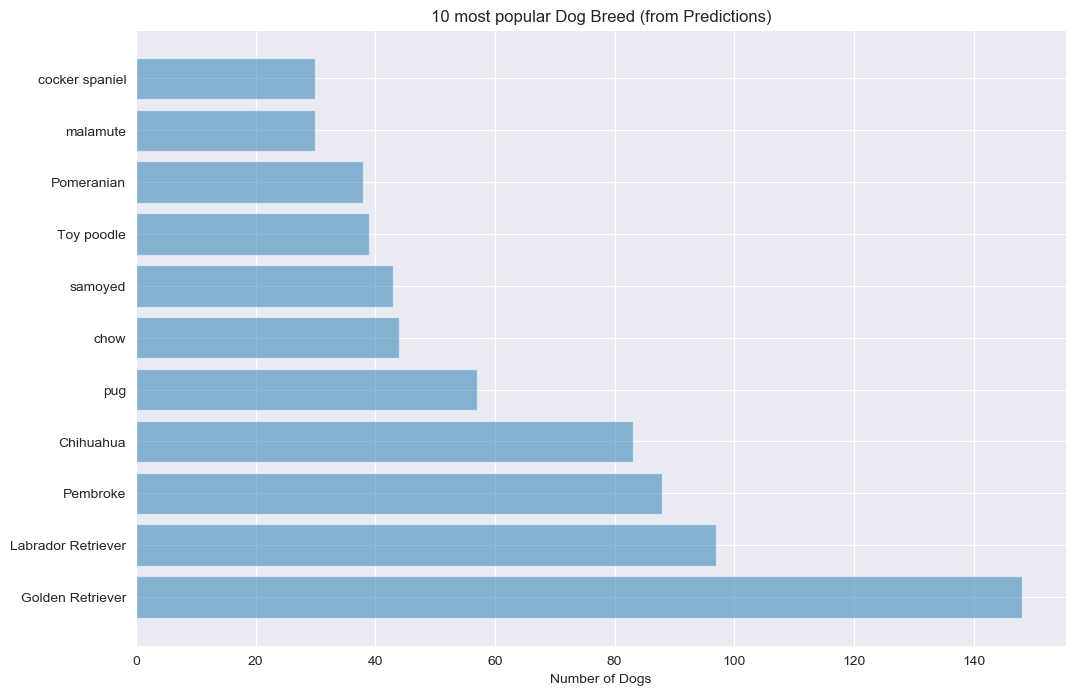

In [259]:
breed_type = ('Golden Retriever', 'Labrador Retriever', 'Pembroke', 'Chihuahua', 'pug', 'chow', 'samoyed', 'Toy poodle', 'Pomeranian', 'malamute', 'cocker spaniel')
breed_count = [148, 97, 88, 83, 57, 44, 43, 39, 38,30,30]
 
fig,ax = plt.subplots(figsize = (12,8))
ax.barh(breed_type, breed_count, alpha=0.5)
plt.yticks(breed_type)
plt.xlabel('Number of Dogs')
plt.title('10 most popular Dog Breed (from Predictions)')
plt.show()

### Dog Stage most represented

In [260]:
final_df.dog_stages.value_counts()

pupper     224
doggo      74 
puppo      29 
floofer    3  
Name: dog_stages, dtype: int64

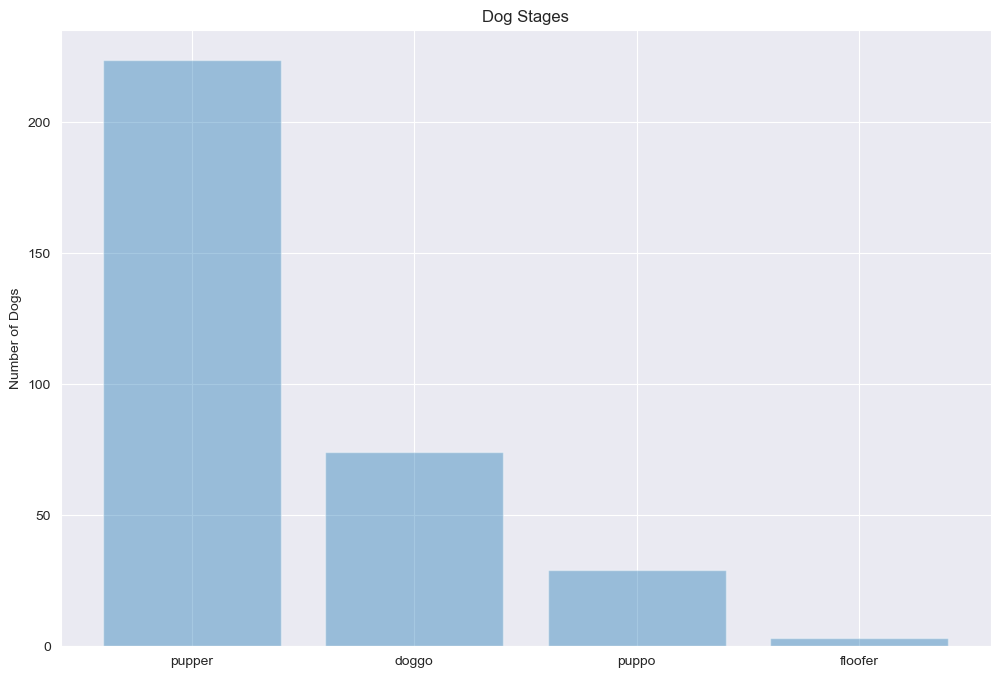

In [261]:
dog_stages = ('pupper', 'doggo', 'puppo', 'floofer')
count = [224, 74, 29, 3]
 
fig,ax = plt.subplots(figsize = (12,8))
ax.bar(dog_stages, count,alpha=0.4)
plt.xticks(dog_stages)
plt.ylabel('Number of Dogs')
plt.title('Dog Stages')
plt.show()

# Insights

### Most Popular Names:

* Charlie
* Oliver
* Lucy
* Tucker
* Penny 
* Cooper

### Popular Dog Breed: 

The Golden Retriever is bar far the most frequent dog breed

###  The most frequent dog stage represented is pupper

The dog stage most frequently represented is pupper, followed by doggo

### Most frequent rating is 12/10

The most frequent dog rating is 12/10!

## Resources and References: 

* Requests Official Documentation: http://docs.python-requests.org/en/master/user/quickstart/#response-content
* Dowloading files using Requests: https://www.geeksforgeeks.org/downloading-files-web-using-python/
* Importing tsv file: https://www.kaggle.com/tinoswe/split-python-dataframe
* Using Tweepy to query twitter API : http://docs.tweepy.org/en/3.7.0/getting_started.html
* Retrieving Data from Twitter API: https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object.html <br>
https://github.com/SThornewillvE/Udacity-Project---Data-Wrangling/blob/master/wrangling-act.ipynb <br>
https://github.com/S-Tabor/udacity-data-wrangling-project/blob/master/wrangle_project_final.ipynb <br>
https://github.com/xhlow/dand-t2-p3-data-wrangling/blob/master/wrangle_act.ipynb
* Matplotlib Bar chart : https://pythonspot.com/matplotlib-bar-chart/
* merging dataframe on index : https://stackoverflow.com/questions/40468069/merge-two-dataframes-by-index
* regular expressions: https://www.youtube.com/watch?v=e0xL9o5VibU
* reverse of is: https://gist.github.com/aswad32/b580ef0311878c7bf710c835bba4f35b
* pandas to_numeric: https://stackoverflow.com/questions/15891038/change-data-type-of-columns-in-pandas
* seeing full  pandas's column text/content:https://stackoverflow.com/questions/25351968/how-to-display-full-non-truncated-dataframe-information-in-html-when-convertin